# Ford GoBike System Data
## by Moataz Alsharqawy

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019 The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering and Assessing Data

In [2]:
df = pd.read_csv('202004-citibike-tripdata.csv')

In [3]:
df.shape

(682762, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             682762 non-null  int64  
 1   starttime                682762 non-null  object 
 2   stoptime                 682762 non-null  object 
 3   start station id         682762 non-null  int64  
 4   start station name       682762 non-null  object 
 5   start station latitude   682762 non-null  float64
 6   start station longitude  682762 non-null  float64
 7   end station id           682762 non-null  int64  
 8   end station name         682762 non-null  object 
 9   end station latitude     682762 non-null  float64
 10  end station longitude    682762 non-null  float64
 11  bikeid                   682762 non-null  int64  
 12  usertype                 682762 non-null  object 
 13  birth year               682762 non-null  int64  
 14  gend

In [5]:
df.rename(columns={"starttime": "start_time",
                   "stoptime": "end_time",
                  "start station id": "start_station_id",
                  "start station name": "start_station_name",
                  "start station latitude": "start_station_latitude",
                  "start station longitude": "start_station_longitude",
                  "end station id": "end_station_id",
                  "end station name": "end_station_name",
                  "end station latitude": "end_station_latitude",
                  "end station longitude": "end_station_longitude",
                  "bikeid": "bike_id",
                  "birth year": "birth_year",
                  "tripduration": "trip_duration_sec",
                  "usertype": "user_type"},inplace=True)

In [6]:
df.head()

,trip_duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,534,2020-04-01 00:00:15.2800,2020-04-01 00:09:09.8730,3656,E 2 St & Avenue A,40.723077,-73.985836,545,E 23 St & 1 Ave,40.736502,-73.978095,15162,Subscriber,1990,2
1,529,2020-04-01 00:02:28.9430,2020-04-01 00:11:18.3410,3163,Central Park West & W 68 St,40.773407,-73.977825,3301,Columbus Ave & W 95 St,40.791956,-73.968087,42861,Subscriber,1974,1
2,1488,2020-04-01 00:02:56.0900,2020-04-01 00:27:44.2530,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3605,31 Ave & Crescent St,40.765835,-73.926547,35989,Subscriber,1982,1
3,341,2020-04-01 00:03:25.1410,2020-04-01 00:09:06.3190,3827,Halsey St & Broadway,40.685650,-73.915640,3869,Van Buren St & Broadway,40.692000,-73.926170,37548,Subscriber,1996,1
4,2206,2020-04-01 00:05:35.2790,2020-04-01 00:42:21.9080,3890,Grove St & Broadway,40.690470,-73.923511,3058,Lewis Ave & Kosciuszko St,40.692371,-73.937054,39701,Subscriber,1977,1


In [196]:
df.describe()

,trip_duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,gender
count,6.827620e+05,682762.000000,682762.000000,682762.000000,682762.000000,682762.000000,682762.000000,682762.000000,682762.000000,682762.000000
mean,1.613020e+03,2015.327895,40.739536,-73.976750,2007.034877,40.739257,-73.976929,34425.154205,1979.859037,1.166216
std,1.938539e+04,1509.876862,0.034530,0.022749,1510.477338,0.034438,0.022748,8309.013653,12.235537,0.606653
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.063913,14530.000000,1885.000000,0.000000
25%,4.740000e+02,426.000000,40.715348,-73.993790,426.000000,40.715348,-73.993836,30037.000000,1969.000000,1.000000
50%,9.700000e+02,3075.000000,40.739355,-73.980680,3067.000000,40.739126,-73.980689,37181.000000,1983.000000,1.000000
75%,1.677000e+03,3407.000000,40.765005,-73.960569,3405.000000,40.764397,-73.960591,40897.000000,1990.000000,2.000000
max,3.786187e+06,3992.000000,40.842842,-73.897950,3992.000000,40.842842,-73.897950,43912.000000,2004.000000,2.000000


In [8]:
df.isnull().sum()

trip_duration_sec          0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
birth_year                 0
gender                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Cleaning Data

In [10]:
gobike = df.copy()

In [11]:
# Change start_time and end_time to datetime format
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

In [12]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        682762 non-null  int64         
 1   start_time               682762 non-null  datetime64[ns]
 2   end_time                 682762 non-null  datetime64[ns]
 3   start_station_id         682762 non-null  int64         
 4   start_station_name       682762 non-null  object        
 5   start_station_latitude   682762 non-null  float64       
 6   start_station_longitude  682762 non-null  float64       
 7   end_station_id           682762 non-null  int64         
 8   end_station_name         682762 non-null  object        
 9   end_station_latitude     682762 non-null  float64       
 10  end_station_longitude    682762 non-null  float64       
 11  bike_id                  682762 non-null  int64         
 12  user_type       

In [13]:
# change the dtype to string 
gobike['gender'] = gobike['gender'].astype(str)

# now change Recoding categorical gender numeric into variable
gobike['gender'] = gobike['gender'].str.replace('0', 'unknown')
gobike['gender'] = gobike['gender'].str.replace('1', 'male')
gobike['gender'] = gobike['gender'].str.replace('2', 'female')

In [14]:
gobike.gender.value_counts()

male       412624
female     191812
unknown     78326
Name: gender, dtype: int64

In [15]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        682762 non-null  int64         
 1   start_time               682762 non-null  datetime64[ns]
 2   end_time                 682762 non-null  datetime64[ns]
 3   start_station_id         682762 non-null  int64         
 4   start_station_name       682762 non-null  object        
 5   start_station_latitude   682762 non-null  float64       
 6   start_station_longitude  682762 non-null  float64       
 7   end_station_id           682762 non-null  int64         
 8   end_station_name         682762 non-null  object        
 9   end_station_latitude     682762 non-null  float64       
 10  end_station_longitude    682762 non-null  float64       
 11  bike_id                  682762 non-null  int64         
 12  user_type       

In [16]:
#this method Returns the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6 
gobike['start_time_dayofweek'] = gobike.start_time.dt.dayofweek

# change Data type of the columne to object 
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].astype(str)

# now we will change these numbers to name of the days  
# Monday=0, Tuesday=1, Wednesday=2 Thursday=3, Friday=4, Saturday=5, Sunday=6
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('0', 'Monday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('1', 'Tuesday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('2', 'Wednesday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('3', 'Thursday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('4', 'Friday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('5', 'Saturday')
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].str.replace('6', 'Sunday')


In [17]:
gobike['start_time_hour']= gobike['start_time'].dt.hour

In [18]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        682762 non-null  int64         
 1   start_time               682762 non-null  datetime64[ns]
 2   end_time                 682762 non-null  datetime64[ns]
 3   start_station_id         682762 non-null  int64         
 4   start_station_name       682762 non-null  object        
 5   start_station_latitude   682762 non-null  float64       
 6   start_station_longitude  682762 non-null  float64       
 7   end_station_id           682762 non-null  int64         
 8   end_station_name         682762 non-null  object        
 9   end_station_latitude     682762 non-null  float64       
 10  end_station_longitude    682762 non-null  float64       
 11  bike_id                  682762 non-null  int64         
 12  user_type       

In [19]:
gobike.start_time_dayofweek.value_counts()

Saturday     136816
Sunday       113954
Wednesday    108731
Tuesday      105598
Thursday      86441
Monday        72134
Friday        59088
Name: start_time_dayofweek, dtype: int64

In [20]:
gobike.start_time_hour.value_counts()

17    74982
16    71972
15    67891
18    67424
14    61863
13    54408
19    47108
12    44070
11    33101
10    25108
20    23689
8     21335
9     20952
7     18068
21    12767
6     10581
22     9322
23     6529
0      3738
5      2623
1      2109
2      1274
4       955
3       893
Name: start_time_hour, dtype: int64

In [21]:
# convert duration to minutes instead of seconds for easy investigations.
gobike['duration_min'] = gobike['trip_duration_sec']/60
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682762 entries, 0 to 682761
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        682762 non-null  int64         
 1   start_time               682762 non-null  datetime64[ns]
 2   end_time                 682762 non-null  datetime64[ns]
 3   start_station_id         682762 non-null  int64         
 4   start_station_name       682762 non-null  object        
 5   start_station_latitude   682762 non-null  float64       
 6   start_station_longitude  682762 non-null  float64       
 7   end_station_id           682762 non-null  int64         
 8   end_station_name         682762 non-null  object        
 9   end_station_latitude     682762 non-null  float64       
 10  end_station_longitude    682762 non-null  float64       
 11  bike_id                  682762 non-null  int64         
 12  user_type       

In [22]:
gobike['User_age']= 2020 - gobike.birth_year

In [23]:
gobike.sample(10)

,trip_duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_time_dayofweek,start_time_hour,duration_min,User_age
402010,2742,2020-04-19 14:54:01.031,2020-04-19 15:39:43.520,3619,Newtown Ave & 23 St,40.771361,-73.924615,3589,Broadway & 12 St,40.766800,-73.934777,39030,Subscriber,1985,female,Sunday,14,45.700000,35
314323,225,2020-04-15 16:13:45.169,2020-04-15 16:17:30.415,3591,21 St & 31 Dr,40.765900,-73.930819,3610,Vernon Blvd & 30 Rd,40.770845,-73.934171,43251,Subscriber,1988,female,Wednesday,16,3.750000,32
244448,189,2020-04-12 12:20:35.224,2020-04-12 12:23:45.052,3898,E 63 St & 3 Ave,40.763954,-73.964600,3152,3 Ave & E 71 St,40.768737,-73.961199,16866,Subscriber,1988,female,Sunday,12,3.150000,32
401129,877,2020-04-19 14:46:03.940,2020-04-19 15:00:41.326,411,E 6 St & Avenue D,40.722281,-73.976687,528,2 Ave & E 31 St,40.742909,-73.977061,32394,Customer,1994,male,Sunday,14,14.616667,26
224082,2295,2020-04-11 15:53:01.443,2020-04-11 16:31:17.056,167,E 39 St & 3 Ave,40.748901,-73.976049,3495,E 114 St & 1 Ave,40.794566,-73.936254,28721,Subscriber,1984,male,Saturday,15,38.250000,36
522883,288,2020-04-25 09:01:31.528,2020-04-25 09:06:19.622,3132,E 59 St & Madison Ave,40.763505,-73.971092,3158,W 63 St & Broadway,40.771639,-73.982614,36313,Subscriber,1980,female,Saturday,9,4.800000,40
371516,2360,2020-04-18 16:15:03.951,2020-04-18 16:54:24.884,3081,Graham Ave & Grand St,40.711863,-73.944024,3082,Hope St & Union Ave,40.711674,-73.951413,43031,Customer,1969,unknown,Saturday,16,39.333333,51
461724,530,2020-04-21 18:55:05.402,2020-04-21 19:03:55.438,3259,9 Ave & W 28 St,40.749370,-73.999234,435,W 21 St & 6 Ave,40.741740,-73.994156,41929,Subscriber,1983,male,Tuesday,18,8.833333,37
647142,152,2020-04-29 05:58:35.172,2020-04-29 06:01:07.703,526,E 33 St & 5 Ave,40.747659,-73.984907,492,W 33 St & 7 Ave,40.750200,-73.990931,33739,Subscriber,1973,male,Wednesday,5,2.533333,47
30733,898,2020-04-02 16:14:59.329,2020-04-02 16:29:58.168,496,E 16 St & 5 Ave,40.737262,-73.992390,325,E 19 St & 3 Ave,40.736245,-73.984738,41113,Subscriber,1967,male,Thursday,16,14.966667,53


In [24]:
gobike.User_age.describe()

count    682762.000000
mean         40.140963
std          12.235537
min          16.000000
25%          30.000000
50%          37.000000
75%          51.000000
max         135.000000
Name: User_age, dtype: float64

is it possible that a person in 135 years old still alive and ride a bike too !!

In [25]:
gobike = gobike[gobike['User_age'] <= 70]

In [26]:
gobike.User_age.describe()

count    676033.000000
mean         39.755868
std          11.603301
min          16.000000
25%          30.000000
50%          37.000000
75%          51.000000
max          70.000000
Name: User_age, dtype: float64

In [27]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676033 entries, 0 to 682761
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        676033 non-null  int64         
 1   start_time               676033 non-null  datetime64[ns]
 2   end_time                 676033 non-null  datetime64[ns]
 3   start_station_id         676033 non-null  int64         
 4   start_station_name       676033 non-null  object        
 5   start_station_latitude   676033 non-null  float64       
 6   start_station_longitude  676033 non-null  float64       
 7   end_station_id           676033 non-null  int64         
 8   end_station_name         676033 non-null  object        
 9   end_station_latitude     676033 non-null  float64       
 10  end_station_longitude    676033 non-null  float64       
 11  bike_id                  676033 non-null  int64         
 12  user_type       

### What is the structure of your dataset?
in this dataset, we have more than 650,000+ individual trip records with 18 variables collected, this data collected in 2020-4 in New York City, the features:

**Time**

- trip_duration_sec                     
- start_time              
- end_time 
- duration_min
- start_time_dayofweek           
- start_time_hour 

**Location**

- start_station_id             
- start_station_name           
- start_station_latitude         
- start_station_longitude        
- end_station_id                   
- end_station_name                 
- end_station_latitude         
- end_station_longitude       

**Bike**

- bike_id

**User**

- user_type                      
- birth_year                      
- gender                                       
- User_age  

### What is/are the main feature(s) of interest in your dataset?
- gender 
- start_time_dayofweek
- User_age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- age and gender - lets us find who are the main target customer 
- start_time_dayofweek - in which day the peak time  our customers

## Univariate Exploration

> In this section, investigate distributions of individual variables.

Text(0.5, 0, 'Trip Start Hour of Day')

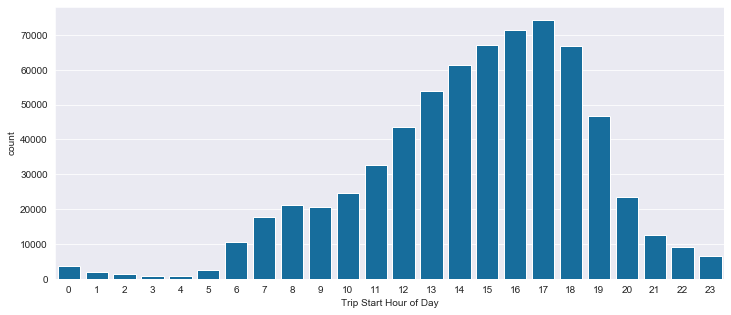

In [28]:
plt.figure(figsize=[12, 5]);
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(gobike['start_time_hour'], color = base_color)
plt.xlabel('Trip Start Hour of Day')

Obviously most of pepule decide to use the bike from 2:00 to 6:00 

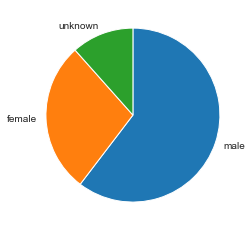

In [29]:
sorted_counts = gobike['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 1});
#plt.axis('square');

more then helf of riders are male !

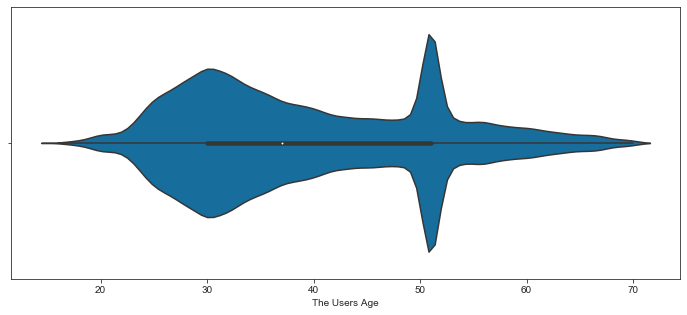

In [57]:
plt.figure(figsize=[12, 5]);
base_color = sb.color_palette('colorblind')[0]

sb.violinplot(gobike['User_age'],color=base_color);

plt.xlabel('The Users Age');

80 thousand of rider from age 50 - 53 with a big difference from Thirties age, why 51!!

also, there are a few old people still ride a bike and that's good

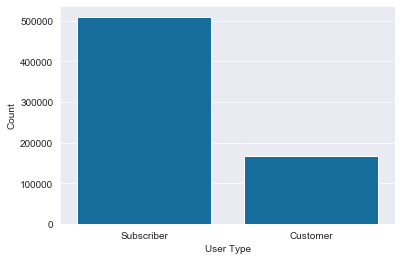

In [31]:
sb.countplot(data=gobike, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

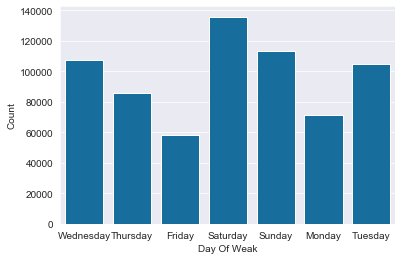

In [32]:
sb.countplot(data=gobike, x='start_time_dayofweek', color=base_color);
plt.xlabel('Day Of Weak');
plt.ylabel('Count');

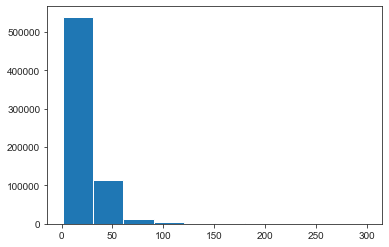

In [202]:
plt.hist(data=gobike, x='duration_min');

In [34]:
gobike.duration_min.describe()

count    676033.000000
mean         26.977461
std         324.636550
min           1.016667
25%           7.933333
50%          16.233333
75%          27.983333
max       63103.116667
Name: duration_min, dtype: float64

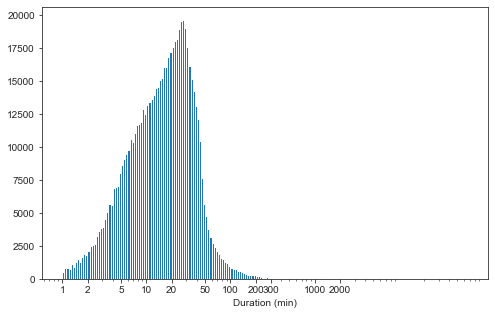

In [35]:
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+0.025, 0.025)
sb.set_style('ticks')
plt.figure(figsize=[8, 5]);
plt.hist(data = gobike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 300, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 300, 1000, 2000]);
plt.xlabel('Duration (min)');

**still there is long tail we should remove it**

In [36]:
gobike = gobike[gobike['duration_min'] <= 300]
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674705 entries, 0 to 682761
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        674705 non-null  int64         
 1   start_time               674705 non-null  datetime64[ns]
 2   end_time                 674705 non-null  datetime64[ns]
 3   start_station_id         674705 non-null  int64         
 4   start_station_name       674705 non-null  object        
 5   start_station_latitude   674705 non-null  float64       
 6   start_station_longitude  674705 non-null  float64       
 7   end_station_id           674705 non-null  int64         
 8   end_station_name         674705 non-null  object        
 9   end_station_latitude     674705 non-null  float64       
 10  end_station_longitude    674705 non-null  float64       
 11  bike_id                  674705 non-null  int64         
 12  user_type       

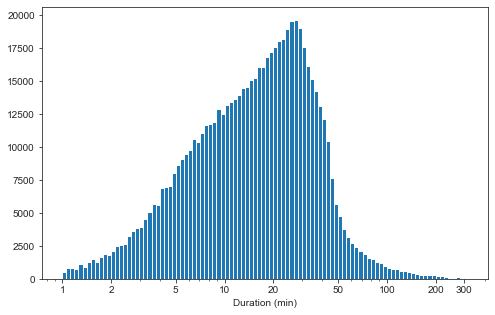

In [37]:
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+0.025, 0.025)

plt.figure(figsize=[8, 5]);
plt.hist(data = gobike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 300], [1, 2, 5, 10, 20, 50, 100, 200, 300]);
plt.xlabel('Duration (min)');

The distribution now looks normal distribution

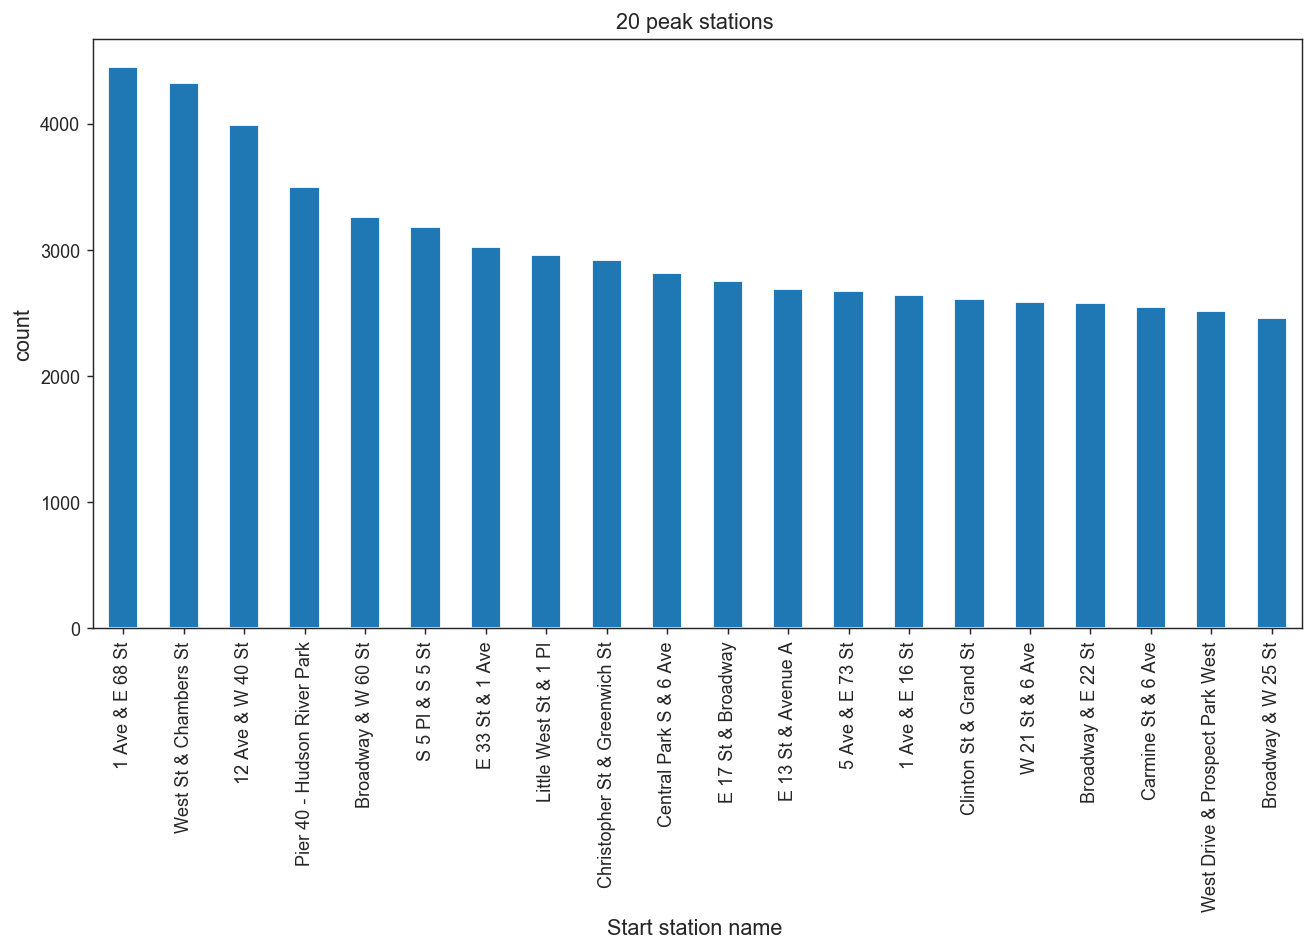

In [121]:
peak_station  = gobike.copy()

 
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Start station name ', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('20 peak stations ')

station_count = peak_station['start_station_name'].value_counts()
peak_station = station_count.nlargest(20)

peak_station.plot(y='favorites_count',kind = 'bar');

- **Try to don't go to 1 Ave & E 68 St station and Chambers St & West St station, I think you will not find a bike!!**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
 
> yes, we found a long tail in ride bike duration so we use a log transformation, for easier investigate data 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I expected that the mean of start hour of the trip on 8 - 10 as a peak time for working people.

In [45]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674705 entries, 0 to 682761
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_sec        674705 non-null  int64         
 1   start_time               674705 non-null  datetime64[ns]
 2   end_time                 674705 non-null  datetime64[ns]
 3   start_station_id         674705 non-null  int64         
 4   start_station_name       674705 non-null  object        
 5   start_station_latitude   674705 non-null  float64       
 6   start_station_longitude  674705 non-null  float64       
 7   end_station_id           674705 non-null  int64         
 8   end_station_name         674705 non-null  object        
 9   end_station_latitude     674705 non-null  float64       
 10  end_station_longitude    674705 non-null  float64       
 11  bike_id                  674705 non-null  int64         
 12  user_type       

## Bivariate Exploration

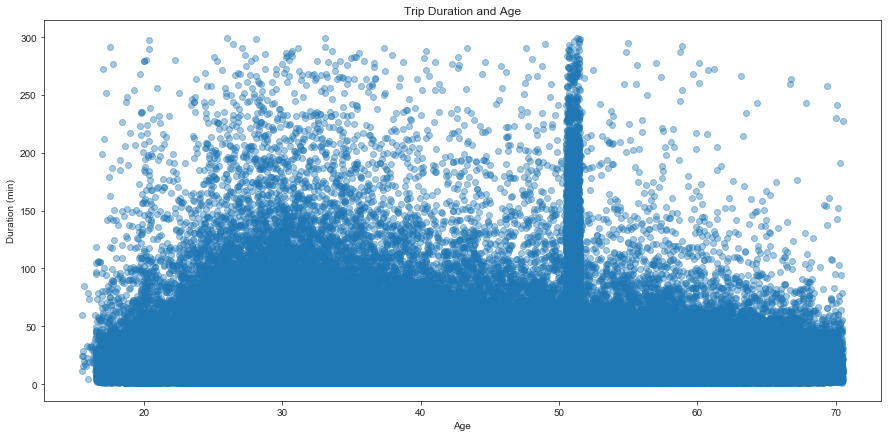

In [163]:
plt.figure(figsize=[15,7]);
sb.regplot(data = gobike, x = 'User_age', y = 'duration_min', fit_reg = False,
           x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 0.4});


plt.title('Trip Duration and Age');
plt.xlabel('Age');
plt.ylabel('Duration (min)');

**as you see There is no specific relationship between duration and age, but in 51-53 kind of relation between a bike at all and this age**

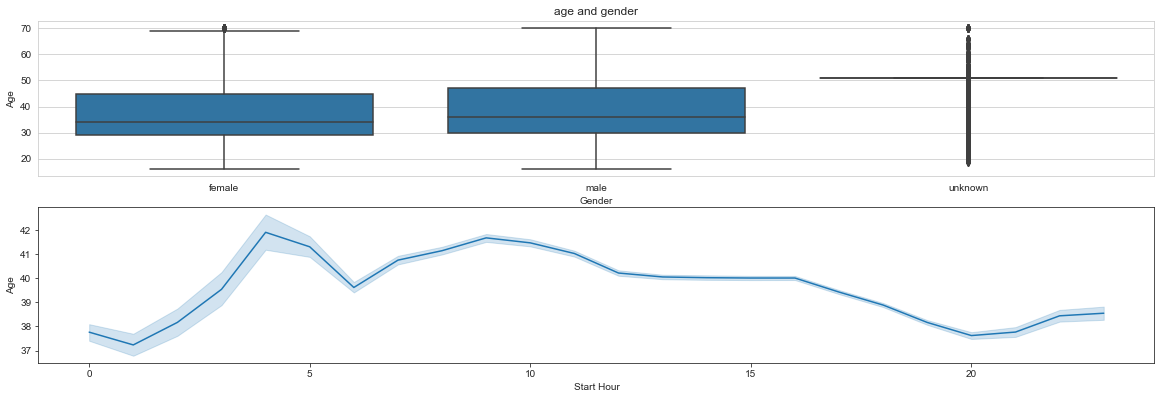

In [160]:
plt.figure(figsize=[20,20]);

sb.set_style("whitegrid")
plt.subplot(6, 1, 1);

base_color = sb.color_palette()[0]
sb.boxplot(data = gobike, x = 'gender', y = 'User_age',color=base_color);

plt.title('age and gender');
plt.xlabel('Gender');
plt.ylabel('Age');

sb.set_style("ticks");
plt.subplot(6, 1, 2);


base_color = sb.color_palette()[0]
sb.lineplot(x = gobike['start_time_hour'] , y = gobike['User_age'], color=base_color);
plt.ylabel('Age');
plt.xlabel('Start Hour');

- **33 is the  median age of the female, and the median age of male is 35**
- **young people use the bike in late night**


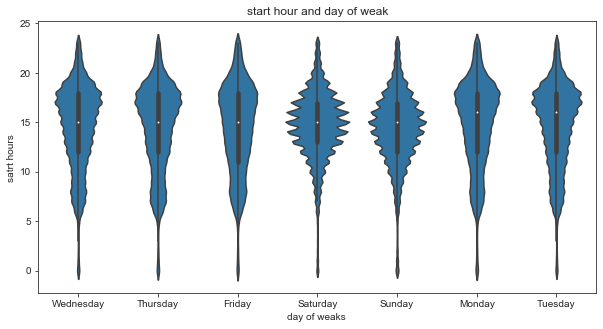

In [105]:
plt.figure(figsize=[10,5]);

sb.set_style("ticks");
base_color = sb.color_palette()[0]

sb.violinplot(x = gobike['start_time_dayofweek'], y = gobike['start_time_hour'],color= base_color);

plt.title('start hour and day of weak');
plt.xlabel('day of weaks ');
plt.ylabel('satrt hours ');

**the median of start hour in all days are around 15**

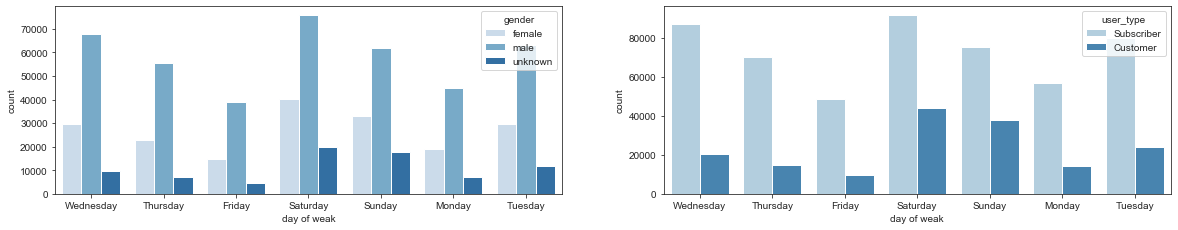

In [130]:
plt.figure(figsize = [20, 20]);


plt.subplot(5, 2, 1);
sb.countplot(data = gobike, x = 'start_time_dayofweek', hue = 'gender', palette = 'Blues');
plt.xlabel('day of weak');



plt.subplot(5, 2, 2);
sb.countplot(data = gobike, x = 'start_time_dayofweek', hue = 'user_type', palette = 'Blues');
plt.xlabel('day of weak');

- **on Saturday has the most riders at all, specific males**
- **in Saturday & sunday customer increase I think it's the right time to do something on that day**

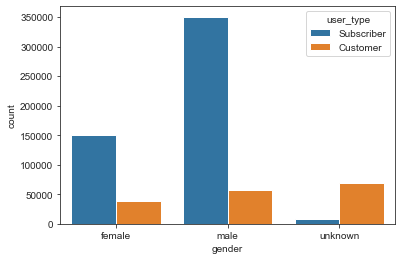

In [149]:
sb.countplot(data = gobike, x = 'gender', hue = 'user_type');

- **most Subscriber are male and most customer are unknown**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - young people use the bike in late night 
- There is no specific relationship between duration and age, but in 51-53 kind of relation between a bike at all and this age
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - on Saturday has the most riders at all, specific males
- in Saturday & sunday customer increase I think it's the right time to do something on that day

## Multivariate Exploration

I consider that the normal trip duration of any users need is 75 min so we will count after 75 min to see which gender ride a bike for long trip duration 

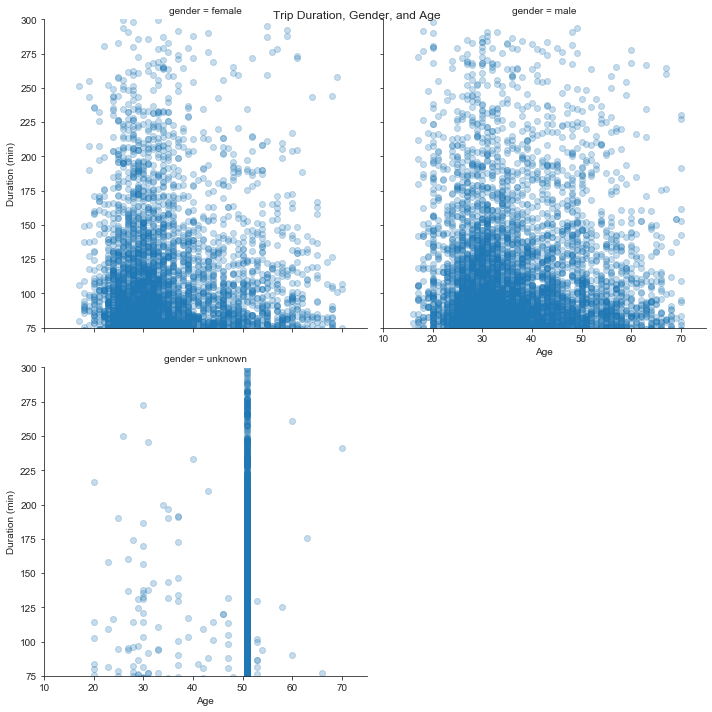

In [194]:
gender = sb.FacetGrid(data = gobike, col = 'gender', col_wrap = 2, size = 5,
                 xlim = [10, 75], ylim = [75, 300])
gender.map(plt.scatter, 'User_age', 'duration_min', alpha= 0.25)


gender.set_xlabels('Age')
gender.set_ylabels('Duration (min)')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

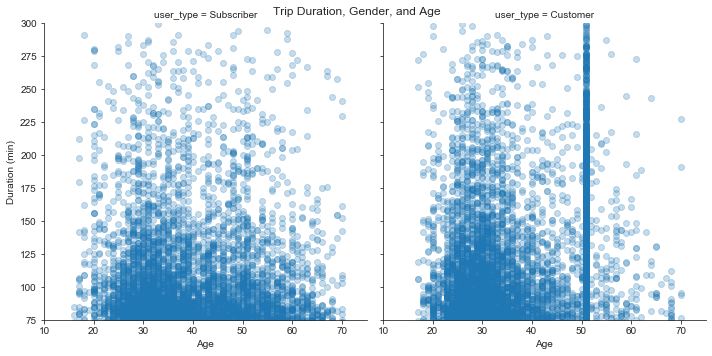

In [195]:
gender = sb.FacetGrid(data = gobike, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 75], ylim = [75, 300])
gender.map(plt.scatter, 'User_age', 'duration_min', alpha= 0.25)


gender.set_xlabels('Age')
gender.set_ylabels('Duration (min)')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I found that male has most of the long trip duration even old man, in addition 

### Were there any interesting or surprising interactions between features?

> a huge number of old age riders  can ride for 125 min for both genders it's mean that an old men or women with 60 years old can drive for 2 hours maybe because they are very slow or they stop many times

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!